In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class f:
    def f(x):
        return
    def prim(x):
        return np.sin(x)

Gradient Descent

In [5]:
def GD(start: float, f: f,n: int, learning_rate: float):
    results = np.zeros(n)
    results[0] = start
    for i in range(1, n):
        grad = f.prim(results[i-1])
        results[i] = results[i-1] - learning_rate * grad
    return results


Stochastic Gradient Descent

In [6]:
def SGD(start: float, f: f,n: int, learning_rate: float, sigma: float, noise = "Normal" or "Uniform"):
    results = np.zeros(n)
    results[0] = start
    for i in range(1, n):
        grad = f.prim(results[i-1])
        if noise == 'Normal':
            noise = np.random.normal(-sigma, sigma)
        elif noise == 'Uniform':
            noise = np.random.uniform(-sigma, sigma)
        results[i] = results[i-1] - learning_rate * grad + noise
    return results


Momentum GD

In [7]:
def momentum_gd(start: float, f: f,n: int, learning_rate: float, beta: float):
    results = np.zeros(n)
    results[0] = start
    v = 0
    for i in range(1, n):
        grad = f.prim(results[i-1])
        v = beta * v + learning_rate * grad
        results[i] = results[i-1] - learning_rate * v
    return results

RMSProp

In [8]:
def RMSProp(start: float, f: f,n: int, learning_rate: float, beta: float):
    results = np.zeros(n)
    results[0] = start
    v = 0
    for i in range(1, n):
        grad = f.prim(results[i-1])
        v = beta * v + (1 - beta) * grad**2
        results[i] = results[i-1] - learning_rate * grad / (np.sqrt(v) + 1e-6)
    return results

ADAM

In [9]:
def ADAM(start: float, f: f,n: int, learning_rate: float, beta1: float, beta2: float):
    results = np.zeros(n)
    results[0] = start
    m = 0
    v = 0
    for i in range(1, n):
        grad = f.prim(results[i-1])
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad**2
        m_hat = m / (1 - beta1**i)
        v_hat = v / (1 - beta2**i)
        results[i] = results[i-1] - learning_rate * m_hat / (np.sqrt(v_hat + 1e-6))
    return results

In [24]:
def plot_all(start: float, end: float, f: f, iterations: int, learning_rate: float, beta: float):
    plt.figure(figsize=(10, 5))
    plt.title(f"Learning rate = {learning_rate}, iterations = {iterations}, beta = {beta}")
    x_vals = np.linspace(start - 2, end + 2, 100)
    y_vals = f.f(x_vals)
    plt.plot(x_vals, y_vals)
    trajectory = momentum_gd(start, f, iterations, learning_rate, beta)
    trajectory_y = f.f(trajectory)
    plt.plot(trajectory, trajectory_y, 'o-')
    trajectory = ADAM(start, f, iterations, learning_rate, beta, 0.99999)
    trajectory_y = f.f(trajectory)
    plt.plot(trajectory, trajectory_y, 'o-')
    trajectory = RMSProp(start, f, iterations, learning_rate, beta)
    trajectory_y = f.f(trajectory)
    plt.plot(trajectory, trajectory_y, 'o-')
    trajectory = GD(start, f, iterations, learning_rate)
    trajectory_y = f.f(trajectory)
    plt.plot(trajectory, trajectory_y, 'o-')
    trajectory = SGD(start, f, iterations, learning_rate, 0.01, "Normal")
    trajectory_y = f.f(trajectory)
    plt.plot(trajectory, trajectory_y, 'o-')
    trajectory = SGD(start, f, iterations, learning_rate, 0.01, "Uniform")
    trajectory_y = f.f(trajectory)
    plt.plot(trajectory, trajectory_y, 'o-')
    plt.legend(["Function", 'Momentum', 'ADAM', 'RMSProp', 'GD', 'SGD Normal', 'SGD Uniform'])
    plt.grid(True)
    plt.show()


def plot_iteration_values(start: float, f: f, iterations: int, learning_rate: float, beta: float):
    plt.figure(figsize=(10, 5))
    plt.title(f"Learning rate = {learning_rate}, iterations = {iterations}, beta = {beta}")
    trajectory = momentum_gd(start, f, iterations, learning_rate, beta)
    plt.plot(range(iterations), trajectory, 'ro-', markersize=3)
    trajectory = ADAM(start, f, iterations, learning_rate, beta, 0.95)
    plt.plot(range(iterations), trajectory, 'bo-', markersize=3)
    trajectory = RMSProp(start, f, iterations, learning_rate, beta)
    plt.plot(range(iterations), trajectory, 'go-', markersize=3)
    trajectory = GD(start, f, iterations, learning_rate)
    plt.plot(range(iterations), trajectory, 'mo-', markersize=3)
    trajectory = SGD(start, f, iterations, learning_rate, 0.01, "Normal")
    plt.plot(range(iterations), trajectory, 'co-', markersize=3)
    trajectory = SGD(start, f, iterations, learning_rate, 0.01, "Uniform")
    plt.plot(range(iterations), trajectory, 'yo-', markersize=3)
    plt.xlabel('iterations')
    plt.ylabel('x')
    plt.legend(["Momentum", "ADAM", "RMSProp", "GD", "SGD Normal", "SGD Uniform"])
    plt.grid(True)
    plt.show()
    

f(x) = $x^2$

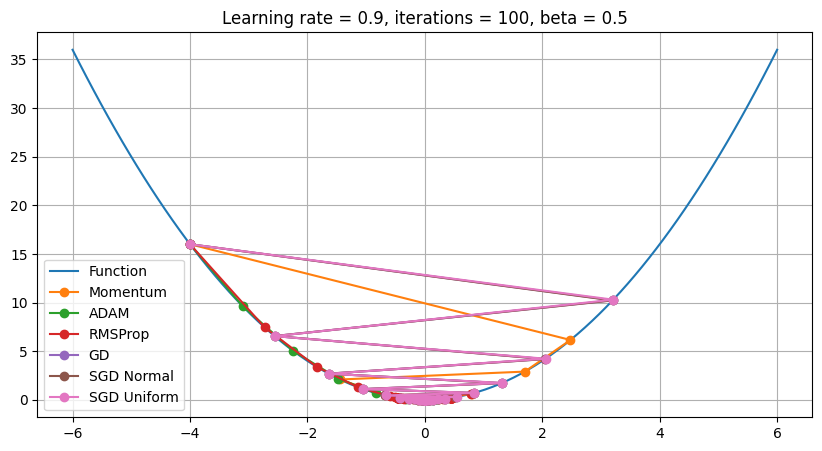

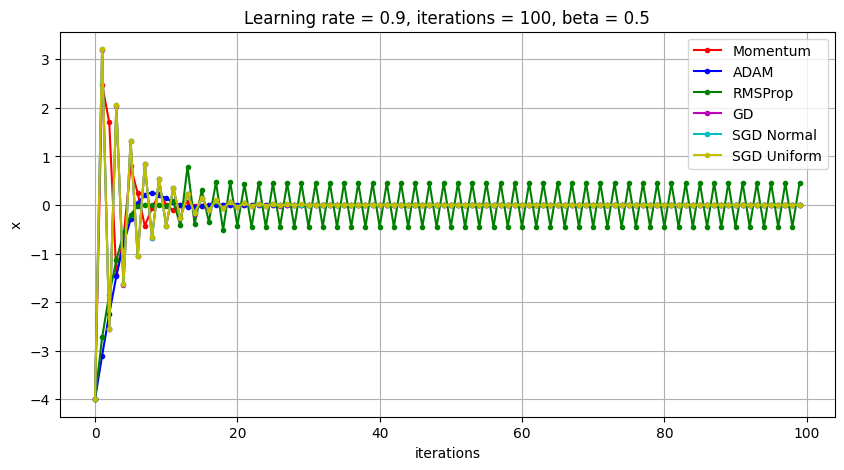

In [25]:

class f:    
    def f(x: float):
        return x**2

    def prim(x: float):
        return 2*x
    

plot_all(-4,4, f, 100, 0.9, 0.5)
plot_iteration_values(-4, f, 100, 0.9, 0.5)

f(x) = $x^3 - 10x^2$

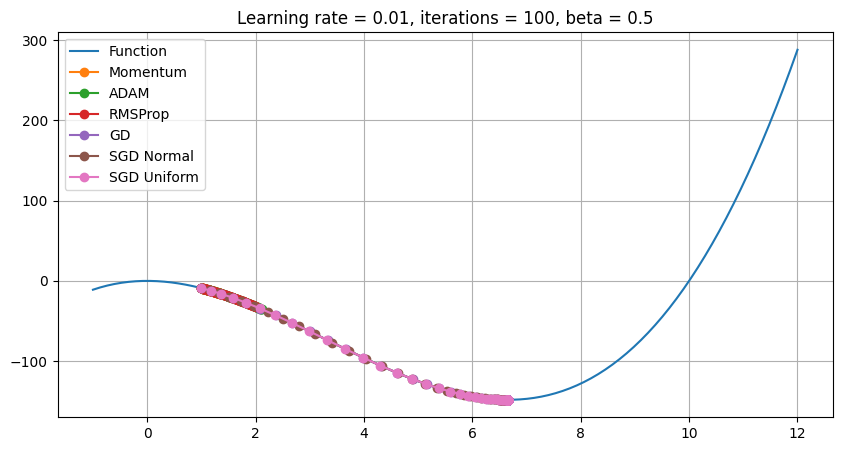

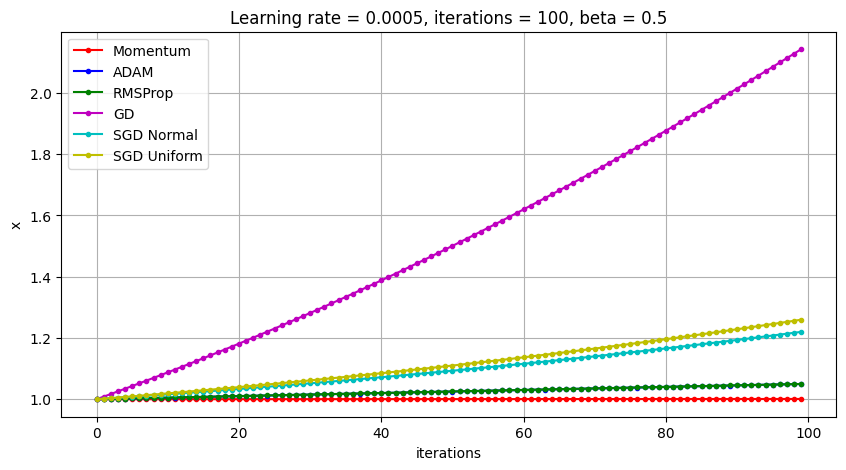

In [26]:
class f:    
    def f(x: float):
        return x**3 - 10*(x**2)

    def prim(x: float):
        return 3*(x**2) - 20*x
    

    

plot_all(1, 10, f, 100, 0.01, 0.5)
plot_iteration_values(1,f, 100, 0.0005, 0.5)

f(x) = $x^4 - 10x^2 - 2x$

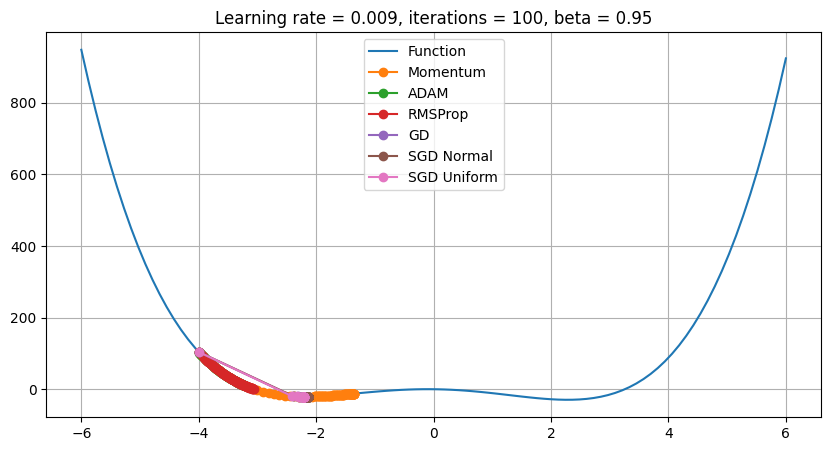

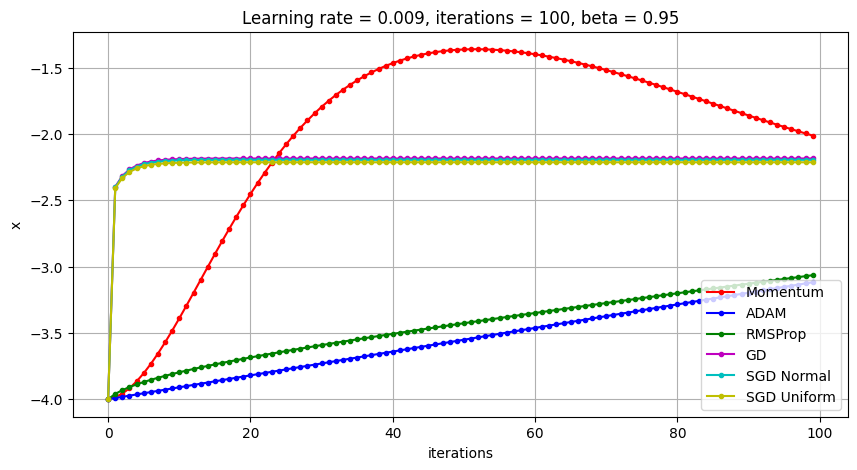

In [27]:
class f:
    def f(x: float):
        return x**4 - 10*x**2 -2*x

    def prim(x: float):
        return 4*x**3 - 20*x -2
    
plot_all(-4, 4, f, 100, 0.009, 0.95)
plot_iteration_values(-4, f, 100, 0.009, 0.95)

Iteration 1 / 35937
Iteration 2 / 35937
Iteration 3 / 35937
Iteration 4 / 35937
Iteration 5 / 35937
Iteration 6 / 35937
Iteration 7 / 35937
Iteration 8 / 35937
Iteration 9 / 35937
Iteration 10 / 35937
Iteration 11 / 35937
Iteration 12 / 35937
Iteration 13 / 35937
Iteration 14 / 35937
Iteration 15 / 35937
Iteration 16 / 35937
Iteration 17 / 35937
Iteration 18 / 35937
Iteration 19 / 35937
Iteration 20 / 35937
Iteration 21 / 35937
Iteration 22 / 35937
Iteration 23 / 35937
Iteration 24 / 35937
Iteration 25 / 35937
Iteration 26 / 35937
Iteration 27 / 35937
Iteration 28 / 35937
Iteration 29 / 35937
Iteration 30 / 35937
Iteration 31 / 35937
Iteration 32 / 35937
Iteration 33 / 35937
Iteration 34 / 35937
Iteration 35 / 35937
Iteration 36 / 35937
Iteration 37 / 35937
Iteration 38 / 35937
Iteration 39 / 35937
Iteration 40 / 35937
Iteration 41 / 35937
Iteration 42 / 35937
Iteration 43 / 35937
Iteration 44 / 35937
Iteration 45 / 35937
Iteration 46 / 35937
Iteration 47 / 35937
Iteration 48 / 35937
I

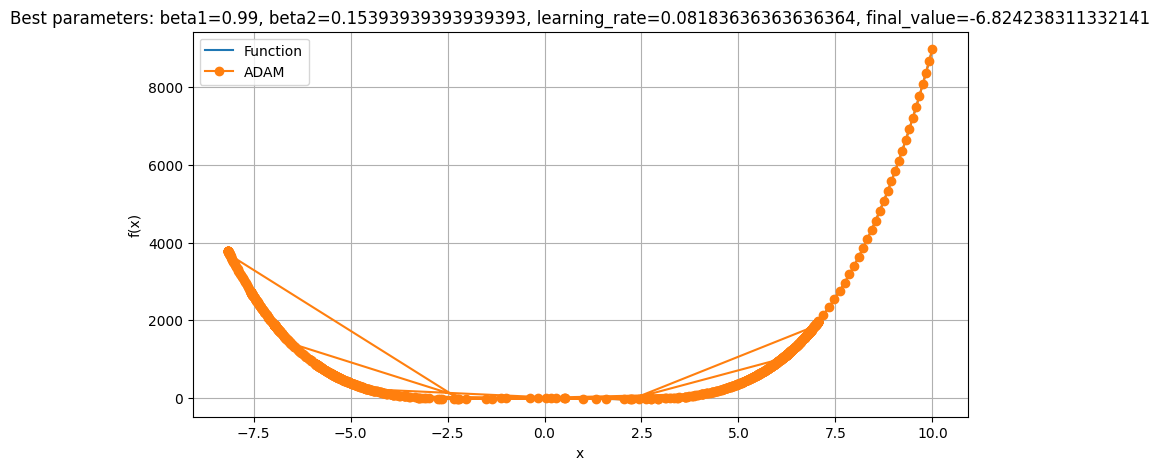

In [33]:
results = []
i = 0
for beta1 in np.linspace(0.1, 0.99, 100)[::3]:
    for beta2 in np.linspace(0.1, 0.99, 100)[::3]:
        for learning_rate in np.linspace(0.0001, 0.1, 100)[::3]:
            i += 1
            print(f"Iteration {i} / {33**3}")
            trajectory = ADAM(10, f, 1000, learning_rate, beta1, beta2)
            results.append((beta1, beta2, learning_rate, trajectory[-1]))

best = min(results, key=lambda x: x[3])
print(f"Best parameters: beta1={best[0]}, beta2={best[1]}, learning_rate={best[2]}, final_value={best[3]}")

plt.figure(figsize=(10, 5))
plt.title(f"Best parameters: beta1={best[0]}, beta2={best[1]}, learning_rate={best[2]}, final_value={best[3]}")
x_vals = np.linspace(0, 10, 100)
y_vals = f.f(x_vals)
plt.plot(x_vals, y_vals)
trajectory = ADAM(10, f, 1000, best[2], best[0], best[1])
trajectory_y = f.f(trajectory)
plt.plot(trajectory, trajectory_y, 'o-')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(["Function", 'ADAM'])
plt.grid(True)
plt.show()